In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
dataset = pd.read_csv(r"F:\Payam\DL\MadaLine.csv")
dataset = dataset.replace(0 , -1)
dataset

,X1,X2,Class
0,-0.642823,0.720606,-1
1,-0.218126,0.677263,-1
2,-0.582930,-0.347496,-1
3,0.285127,0.091750,-1
4,-0.335577,-0.313893,-1
...,...,...,...
195,0.744066,-1.206548,1
196,-0.457547,1.286227,1
197,-1.020000,-0.783926,1
198,1.363429,-0.800250,1


In [3]:
classA = dataset[dataset['Class'] ==-1]
classB = dataset[dataset['Class'] == 1]
classA_vals = classA[['X1' , 'X2']].values
classB_vals = classB[['X1' , 'X2']].values
classA_X1 = classA_vals[:,0] 
classA_X2 = classA_vals[:,1] 
classB_X1 = classB_vals[:,0] 
classB_X2 = classB_vals[:,1]

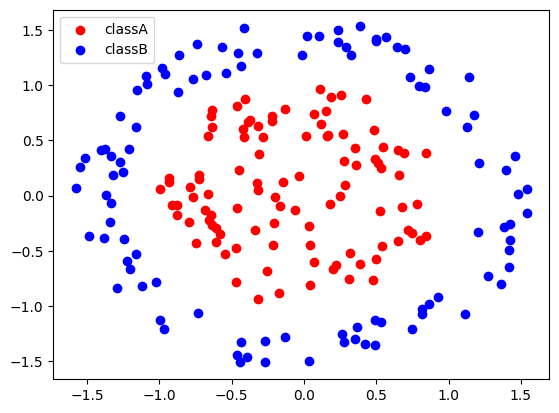

In [4]:
plt.scatter(classA_X1 , classA_X2 , color="red")
plt.scatter(classB_X1 , classB_X2 , color="blue")
plt.legend(["classA" , "classB"] , loc="upper left")